<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [5]:
# Answer:

movies.shape

(979, 6)

#### Check the data type of each column.

In [6]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [7]:
# Answer:
movies.duration.mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [12]:
# Answer:
movies.sort_values(by='duration')

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
742,7.6,Following,R,Mystery,69,"[u'Jeremy Theobald', u'Alex Haw', u'Lucy Russe..."
351,8.0,Frankenstein,UNRATED,Horror,70,"[u'Colin Clive', u'Mae Clarke', u'Boris Karloff']"
938,7.4,Alice in Wonderland,G,Animation,75,"[u'Kathryn Beaumont', u'Ed Wynn', u'Richard Ha..."
405,7.9,The Bride of Frankenstein,NOT RATED,Horror,75,"[u'Boris Karloff', u'Elsa Lanchester', u'Colin..."
303,8.0,The Nightmare Before Christmas,PG,Animation,76,"[u'Danny Elfman', u'Chris Sarandon', u""Catheri..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

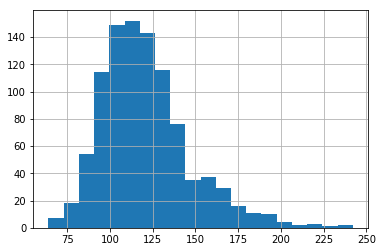

In [14]:
# Answer:
movies.duration.hist(bins=20);

#### Use a box plot to display that same data.

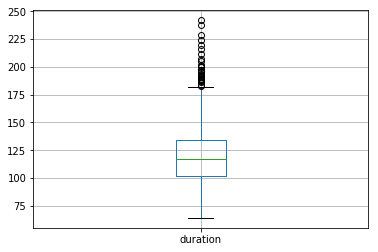

In [18]:
# Answer:
movies.boxplot(column='duration');

## Intermediate level

#### Count how many movies have each of the content ratings.

In [21]:
# Answer: 
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

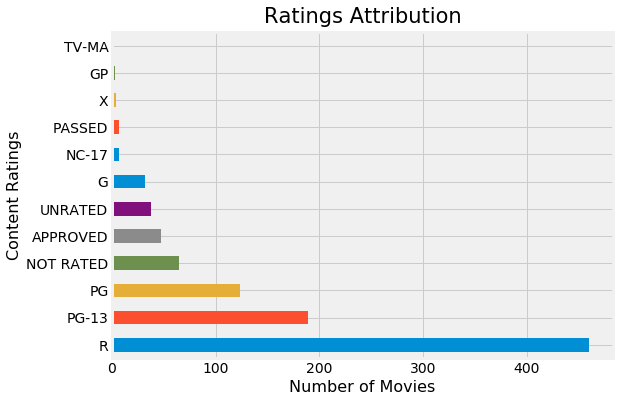

In [24]:
# Answer:

from IPython.display import HTML

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

#plot horizontal bar chart
ax = movies.content_rating.value_counts().plot(kind='barh')

# Set the title.
ax.set_title('Ratings Attribution', fontsize=21, y=1.01);

# x-axis labels
ax.set_ylabel('Content Ratings', fontsize=16);

# y-axis labels
ax.set_xlabel('Number of Movies', fontsize=16);

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [40]:
# Answer:

#replace specified values with "Unrated"
unrated = movies.content_rating.replace( ['NOT RATED', 'APPROVED', 'PASSED', 'GP.'],'UNRATED', regex=True )

#display value counts to showcase that replacement has occured
unrated.value_counts()

R          460
PG-13      189
UNRATED    157
PG         123
G           32
NC-17        7
X            4
GP           3
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [39]:
# Answer:
# replace the specified ratings by NC-17
NC17 = movies.content_rating.replace( ['X', 'TV-MA'],'NC-17', regex=True )

#display value counts to ensure that replacement occured.
NC17.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17         12
PASSED         7
GP             3
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [48]:
# Answer:

#using isnull and sum methods to calculate total number of missing values in each column
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [50]:
# Answer:

# I replace the missing values in content_ratings with "missing", then I display column value counts to show that 
# "missing is there now"
movies.content_rating.fillna('missing').value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
missing        3
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [57]:
# Answer:
#filtering movies with duration above 120 mins ==2 hrs and calculating a mean rating
movies[movies.duration >120].star_rating.mean()


7.953669724770622

In [58]:
# iltering movies with duration below 120 mins ==2 hrs and calculating a mean rating. We find that movies with duration
#above 2 hours have average ratings that are slightly higher.
movies[movies.duration <120].star_rating.mean()

7.838666666666657

#### Use a visualization to detect whether there is a relationship between duration and star rating.

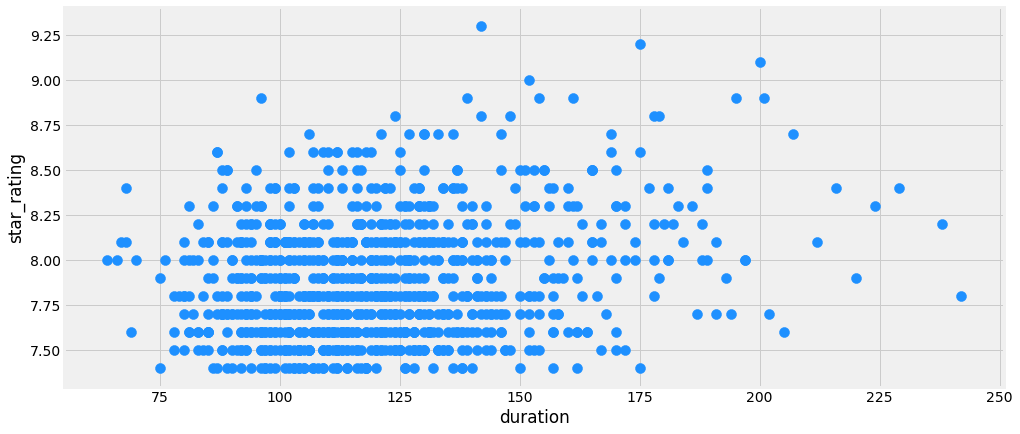

In [61]:
# Answer: I create a scatter plot below and I see that there is not much of a meaningful relationship between duration
# and ratings

movies.plot(x='duration', y='star_rating', kind='scatter', 
           color='dodgerblue', figsize=(15,7), s=100);

#### Calculate the average duration for each genre.

In [65]:
# Answer: first I group by genre and then I calculate mean

movies.groupby('genre').duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

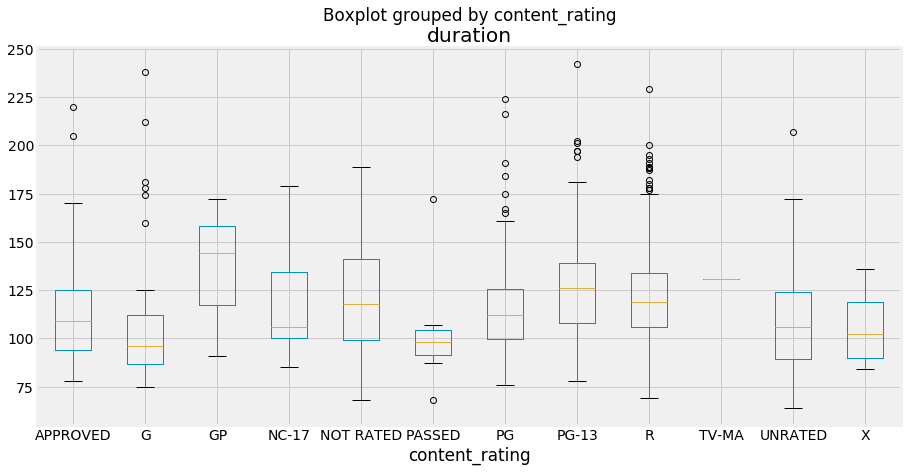

In [69]:
# Answer:

movies.boxplot(column='duration', by = 'content_rating', figsize=(15,7));

#### Determine the top rated movie (by star rating) for each genre.

In [83]:
# Answer:
movies.loc[movies.groupby('genre').star_rating.idxmax()]

,star_rating,title,content_rating,genre,duration,actors_list
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
30,8.6,Spirited Away,PG,Animation,125,"[u'Daveigh Chase', u'Suzanne Pleshette', u'Miy..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
25,8.6,Life Is Beautiful,PG-13,Comedy,116,"[u'Roberto Benigni', u'Nicoletta Braschi', u'G..."
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
468,7.9,E.T. the Extra-Terrestrial,PG,Family,115,"[u'Henry Thomas', u'Drew Barrymore', u'Peter C..."
638,7.7,The City of Lost Children,R,Fantasy,112,"[u'Ron Perlman', u'Daniel Emilfork', u'Judith ..."
105,8.3,The Third Man,NOT RATED,Film-Noir,93,"[u'Orson Welles', u'Joseph Cotten', u'Alida Va..."


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [90]:
# Answer:
#use duplicated method to find duplicated movies. i set keep parameter of the method to false so it shows me all 
# duplicates. I sorted by the movie title. These movies are not actually duplicates since they have different actors.

movies[movies.duplicated('title', False)].sort_values(by='title')

,star_rating,title,content_rating,genre,duration,actors_list
703,7.6,Dracula,APPROVED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [105]:
# Answer: first I print the list of value counts for each genre to manually identify which one is above 10.


print(movies.genre.value_counts())

#filter using that list

Relevant_group = ['Drama', 'Comedy','Action','Crime','Biography','Adventure','Animation','Horror','Mystery']
movies[movies.genre.isin(Relevant_group)].groupby('genre').star_rating.mean()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64


genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [132]:
# Answer:

# count number of movies in each genre
counts = movies.genre.value_counts()

# write genres with more than 10 movies into a list
Rel_G = counts[counts>=10].index.tolist()

# filter by genre using the list we created and find average rating
movies[movies.genre.isin(Rel_G)].groupby('genre').star_rating.mean()







genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [134]:
# Answer
movies.groupby('genre').star_rating.mean()[movies.genre.value_counts() >= 10]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [154]:
# aggregate data by count and mean of star_rating
aggregated = movies.groupby('genre').star_rating.agg({'count','mean'})

# filter by genres with count >10
aggregated[aggregated['count'] >= 10]


,mean,count
genre,,
Action,7.884559,136
Adventure,7.933333,75
Animation,7.914516,62
Biography,7.862338,77
Comedy,7.822436,156
Crime,7.916935,124
Drama,7.902518,278
Horror,7.806897,29
Mystery,7.975000,16


## Bonus

#### Figure out something "interesting" using the actors data!

In [189]:
# I wanted to see all of the movies in the DataFrame with my favorite actor Morgan Freeman.

movies.actors_list.replace('u','', regex=True)


movies.loc[actors.str.contains("Morgan Freeman")]


,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
24,8.7,Se7en,R,Drama,127,"[u'Morgan Freeman', u'Brad Pitt', u'Kevin Spac..."
119,8.3,Unforgiven,R,Western,131,"[u'Clint Eastwood', u'Gene Hackman', u'Morgan ..."
227,8.1,Million Dollar Baby,PG-13,Drama,132,"[u'Hilary Swank', u'Clint Eastwood', u'Morgan ..."
549,7.8,Lucky Number Slevin,R,Crime,110,"[u'Josh Hartnett', u'Ben Kingsley', u'Morgan F..."
621,7.7,Gone Baby Gone,R,Crime,114,"[u'Morgan Freeman', u'Ed Harris', u'Casey Affl..."
943,7.4,The Bucket List,PG-13,Adventure,97,"[u'Jack Nicholson', u'Morgan Freeman', u'Sean ..."
962,7.4,Driving Miss Daisy,PG,Comedy,99,"[u'Morgan Freeman', u'Jessica Tandy', u'Dan Ay..."
